In [1]:
### This notebook is to create all plots in the paper ###

In [2]:
## define the path ##
vm_path = "data/velocity_model/CF_test.npy"

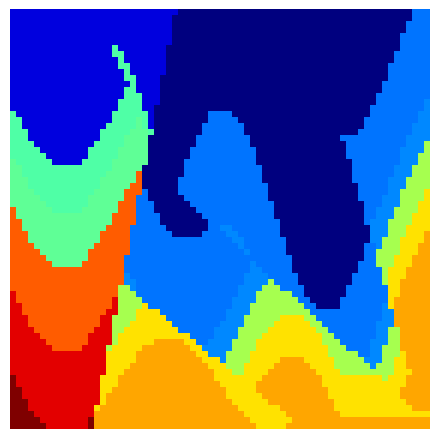

In [28]:
## define a function to create the image ##
import numpy as np
import matplotlib.pyplot as plt
import os 
plt.rcParams["font.size"] = 20

def plot(vm_path, index=0, axis=False, save_path=None, num_ticks=5):
    data = np.load(vm_path)[index:index+1]

    fig, ax = plt.subplots(dpi=100)

    if axis:
        extent = [0, 700, 700, 0]
        im = ax.imshow(data[0, 0], cmap='jet', extent=extent, vmin=1500, vmax=4500)

        # Set evenly spaced tick marks
        ticks = np.linspace(0, 700, num_ticks)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)

        # Optional: label axes
        ax.set_xlabel('Length (m)')
        ax.set_ylabel('Depth (m)')

        fig.colorbar(im, ax=ax, label='Velocity (m/s)', orientation='vertical')
    else:
        im = ax.imshow(data[0, 0], cmap='jet')
        ax.axis('off')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path + f"velocity_model_{index}_axis{axis}.png", bbox_inches='tight', pad_inches=0)
    else:
        plt.show()

save_path = "plots/problem_setup/"
os.makedirs(save_path, exist_ok=True)
# plot the velocity model
plot(vm_path, index=0, axis=False, save_path = save_path, num_ticks=5)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
def plot_single(data, save_path, index=0, source=0, axis=False):
    data = data[index, source]
    nz, nx = data.shape
    
    fig, ax = plt.subplots(dpi=100)
    im = ax.matshow(data, aspect='auto', cmap='gray', vmin=-1, vmax=2)

    # Maintain proportional scaling
    ax.set_aspect(aspect=nx / nz)

    # X-axis: 0 to 700 meters
    num_ticks = 5
    x_ticks = np.linspace(0, nx - 1, num_ticks).astype(int)
    x_labels = np.linspace(0, 700, num_ticks).astype(int)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('Length (m)')
    # Y-axis: 0 to 1000 ms (inclusive)
    y_labels = np.arange(0, 1001, 200)
    y_ticks = (y_labels / 1000 * nz).astype(int)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Time (ms)')
    if not axis:
            ax.axis('off')

    plt.tight_layout()
    plt.savefig(save_path + f"seismic_plot_index_{index}_source_{source}_axis{axis}.png", bbox_inches='tight', pad_inches=0)
    plt.close(fig)

s_path = "data/seismic_data/CF_test.npy"
s_data = np.load(s_path)
save_path = "plots/problem_setup/"
for s in range(5):
    plot_single(s_data, index=0, source=s, save_path=save_path, axis=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
def plot_single(data, save_path, index=0, source=0, axis=False):
    data = data[index, source]
    nz, nx = data.shape
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    im = ax.matshow(data, aspect='auto', cmap='gray', vmin=-1, vmax=2)

    # Maintain proportional scaling
    ax.set_aspect(aspect=nx / nz)

    # X-axis: 0 to 700 meters
    num_ticks = 5
    x_ticks = np.linspace(0, nx - 1, num_ticks).astype(int)
    x_labels = np.linspace(0, 700, num_ticks).astype(int)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('Length (m)')
    # Y-axis: 0 to 1000 ms (inclusive)
    y_labels = np.arange(0, 1001, 200)
    y_ticks = (y_labels / 1000 * nz).astype(int)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Time (ms)')
    if not axis:
            ax.axis('off')

    plt.tight_layout()
    plt.savefig(save_path + f"seismic_plot_index_{index}_source_{source}_axis{axis}.png", bbox_inches='tight', pad_inches=0)
    plt.close(fig)

s_path = "data/seismic_data/CF_test.npy"
s_data = np.load(s_path)
save_path = "plots/problem_setup/"
for s in range(5):
    plot_single(s_data, index=0, source=s, save_path=save_path, axis=True)

In [ ]:
vm_data = np.load(vm_path)
print(f"Velocity Model Data Shape: {vm_data.shape}")
s_data = np.load(s_path)
print(f"Seismic Data Shape: {s_data.shape}")

Velocity Model Data Shape: (100, 1, 70, 70)
Seismic Data Shape: (100, 5, 1000, 70)


In [32]:
vm_10_data = vm_data[:10, :, :]
s_10_data = s_data[:10, :, :]
print(f"Velocity Model Data Shape for 10 samples: {vm_10_data.shape}")
print(f"Seismic Data Shape for 10 samples: {s_10_data.shape}")

Velocity Model Data Shape for 10 samples: (10, 1, 70, 70)
Seismic Data Shape for 10 samples: (10, 5, 1000, 70)


In [37]:
stylies = ["CF", "CV", "FF", "FV"]
for style in stylies:
    vm_path = f"data/velocity_model/{style}_test.npy"
    s_path = f"data/seismic_data/{style}_test.npy"
    
    vm_data = np.load(vm_path)
    s_data = np.load(s_path)

    vm_10_data = vm_data[:10, :, :]
    s_10_data = s_data[:10, :, :]
    
    np.save(f"dataset/seismic_data/{style}.npy", s_10_data)
    np.save(f"dataset/velocity_model/{style}.npy", vm_10_data)

for style in stylies:
    vm_path = f"dataset/velocity_model/{style}.npy"
    s_path = f"dataset/seismic_data/{style}.npy"
    
    vm_data = np.load(vm_path)
    s_data = np.load(s_path)

    print(f"Velocity Model Data Shape for {style}: {vm_data.shape}")
    print(f"Seismic Data Shape for {style}: {s_data.shape}")

Velocity Model Data Shape for CF: (10, 1, 70, 70)
Seismic Data Shape for CF: (10, 5, 1000, 70)
Velocity Model Data Shape for CV: (10, 1, 70, 70)
Seismic Data Shape for CV: (10, 5, 1000, 70)
Velocity Model Data Shape for FF: (10, 1, 70, 70)
Seismic Data Shape for FF: (10, 5, 1000, 70)
Velocity Model Data Shape for FV: (10, 1, 70, 70)
Seismic Data Shape for FV: (10, 5, 1000, 70)
